#Закрепление знаний

Вам предоставлен набор данных, первоначально полученный в Национальном институте диабета, болезней органов пищеварения и почек. 

Этот набор данных создан для того, чтобы на основе определённых диагностических измерений предсказать, есть ли у пациента диабет. 

На выбор этих экземпляров из более крупной базы данных было наложено несколько ограничений. В частности, все пациенты здесь — женщины не моложе 21 года индейского происхождения Пима.

Прочитаем наши данные и выведем первые пять строк таблицы:

In [81]:
import pandas as pd

diabetes = pd.read_csv('data/diabetes_data.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


* Pregnancies — количество беременностей.

* Glucose — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе.

* BloodPressure — диастолическое артериальное давление (мм рт. ст.).

* SkinThickness — толщина кожной складки трицепса (мм).

* Insulin — двухчасовой сывороточный инсулин (ме Ед/мл).

* BMI — индекс массы тела (вес_в_кг/(рост_в_см)**2).

* DiabetesPedigreeFunction — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости).

* Age — возраст.

* Outcome — наличие диабета (0 — нет, 1 — да).

Предварительно вы можете провести небольшой разведывательный анализ: посмотреть на распределения признаков и оценить их взаимосвязь с признаком наличия диабета.

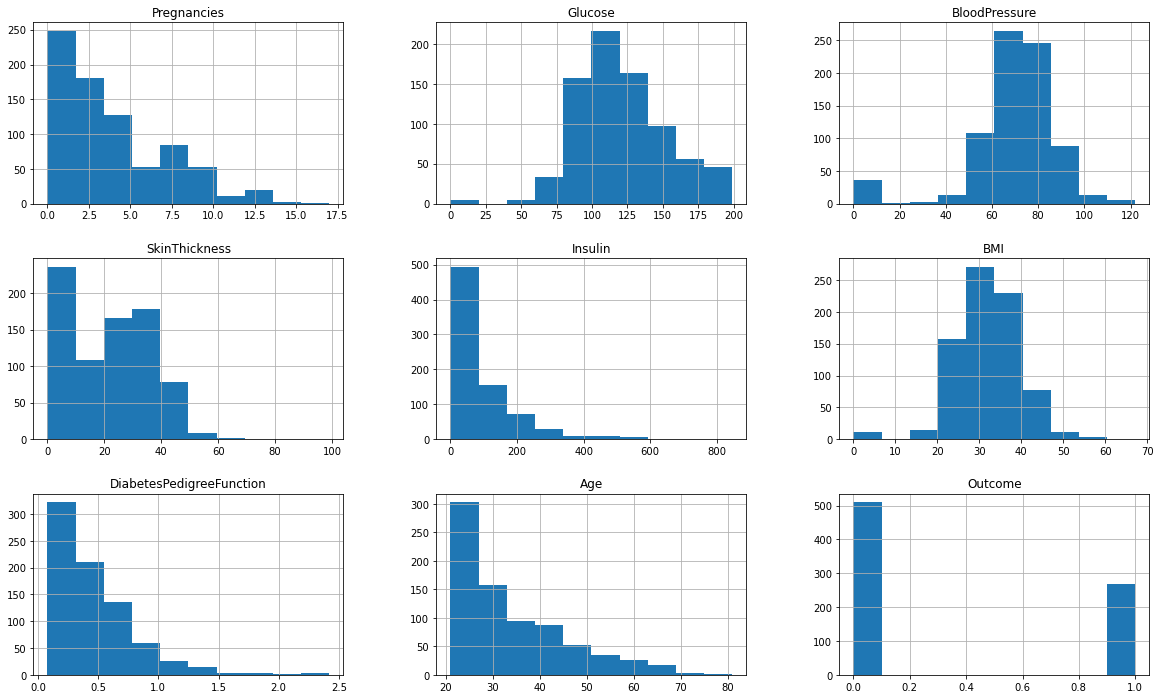

In [82]:
diabetes.hist(figsize=(20, 12));

###Задание 8.1

Начнём с поиска дубликатов в данных. Найдите все повторяющиеся строки в данных и удалите их. Для поиска используйте все признаки в данных. Сколько записей осталось в данных?

In [83]:
diabetes_droped = diabetes.drop_duplicates()

print('Записей было:', diabetes.shape[0])
print('Записей осталось:', diabetes_droped.shape[0])


Записей было: 778
Записей осталось: 768


###Задание 8.2

Далее найдите все неинформативные признаки в данных и избавьтесь от них. В качестве порога информативности возьмите 0.99: удалите все признаки, для которых 99 % значений повторяются или 99 % записей уникальны. В ответ запишите имена признаков, которые вы нашли (без кавычек).

In [84]:
#список неинформативных признаков
low_information_cols = [] 

#цикл по всем столбцам
for col in diabetes_droped.columns:
    #наибольшая относительная частота в признаке
    top_freq = diabetes_droped[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = diabetes_droped[col].nunique() / diabetes_droped[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.99:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.99:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

Gender: 100.0% одинаковых значений


In [85]:
diabetes_droped = diabetes_droped.drop(low_information_cols, axis=1)
print(f'Результирующее число признаков: {information_diabetes_droped.shape[1]}')

Результирующее число признаков: 9


###Задание 8.3

Попробуйте найти пропуски в данных с помощью метода insull().

Спойлер: ничего не найдёте. А они есть! Просто они скрыты от наших глаз. В таблице пропуски в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI обозначены нулём, поэтому традиционные методы поиска пропусков ничего вам не покажут. Давайте это исправим!

Замените все записи, равные 0, в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI на символ пропуска. Его вы можете взять из библиотеки numpy: np.nan.

Какая доля пропусков содержится в столбце Insulin? Ответ округлите до сотых.

In [86]:
import numpy as np

col_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [87]:
def null_replace(feature):
    if feature == 0:
        return np.nan
    else:
        return feature

In [88]:
for column in col_list:
    diabetes_droped[column] = diabetes_droped[column].apply(null_replace)

In [89]:
diabetes_droped


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,190.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,NaN,35.7,0.148,21,0
2,2,108.0,64.0,NaN,NaN,30.8,0.158,21,0
3,8,107.0,80.0,NaN,NaN,24.6,0.856,34,0
4,7,136.0,90.0,NaN,NaN,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
763,5,139.0,64.0,35.0,140.0,28.6,0.411,26,0
764,1,96.0,122.0,NaN,NaN,22.4,0.207,27,0
765,10,101.0,86.0,37.0,NaN,45.6,1.136,38,1
766,0,141.0,NaN,NaN,NaN,42.4,0.205,29,1


In [90]:
diabetes_droped.isnull().mean().round(2).sort_values(ascending=False)

Insulin                     0.49
SkinThickness               0.30
BloodPressure               0.05
Glucose                     0.01
BMI                         0.01
Pregnancies                 0.00
DiabetesPedigreeFunction    0.00
Age                         0.00
Outcome                     0.00
dtype: float64

###Задание 8.4

Удалите из данных признаки, где число пропусков составляет более 30 %. Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?

In [91]:
diabetes_droped = diabetes_droped.dropna(
    how='any', 
    thresh=diabetes_droped.shape[0]*0.7, 
    axis=1
    )

diabetes_droped.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,NaN,30.8,0.158,21,0
3,8,107.0,80.0,NaN,24.6,0.856,34,0
4,7,136.0,90.0,NaN,29.9,0.210,50,0


Задание 8.5

Удалите из данных только те строки, в которых содержится более двух пропусков одновременно. Чему равно результирующее число записей в таблице?

In [92]:
diabetes_droped = diabetes_droped.dropna(
    how='any', 
    thresh=diabetes_droped.shape[1]-2, 
    axis=0
    )

diabetes_droped

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,NaN,30.8,0.158,21,0
3,8,107.0,80.0,NaN,24.6,0.856,34,0
4,7,136.0,90.0,NaN,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...
763,5,139.0,64.0,35.0,28.6,0.411,26,0
764,1,96.0,122.0,NaN,22.4,0.207,27,0
765,10,101.0,86.0,37.0,45.6,1.136,38,1
766,0,141.0,NaN,NaN,42.4,0.205,29,1


###Задание 8.6

В оставшихся записях замените пропуски на медиану. Чему равно среднее значение в столбце SkinThickness? Ответ округлите до десятых.

In [93]:
values = {
    'Pregnancies': diabetes_droped['Pregnancies'].median(),
    'Glucose': diabetes_droped['Glucose'].median(),
    'BloodPressure': diabetes_droped['BloodPressure'].median(),
    'SkinThickness': diabetes_droped['SkinThickness'].median(),
    'BMI': diabetes_droped['BMI'].median(),
    'DiabetesPedigreeFunction': diabetes_droped['DiabetesPedigreeFunction'].median(),
    'Age': diabetes_droped['Age'].median(),
    'Outcome': diabetes_droped['Outcome'].median()
}
#заполняем оставшиеся записи константами в соответствии со словарем values
diabetes_droped = diabetes_droped.fillna(values)

round(diabetes_droped['SkinThickness'].mean(), 1)


29.1

###Задание 8.7

Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?

In [94]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [95]:
outliers, cleaned = outliers_iqr(diabetes_droped, 'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 87
Результирующее число записей: 674


###Задание 8.8

Сколько выбросов найдёт классический метод z-отклонения в признаке SkinThickness?

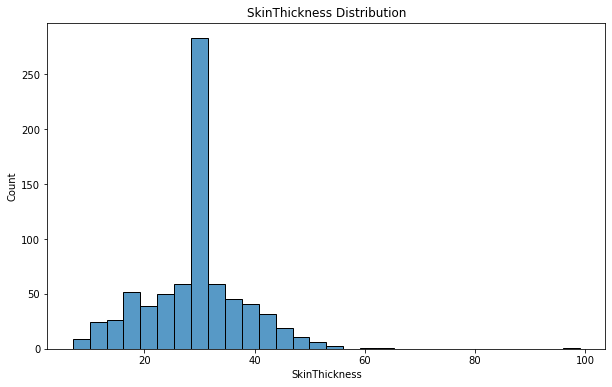

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(figsize=(10, 6))

#гистограмма исходного признака
histplot = sns.histplot(diabetes_droped['SkinThickness'], bins=30)
histplot.set_title('SkinThickness Distribution');

In [97]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [99]:
outliers, cleaned = outliers_z_score(diabetes_droped, 'SkinThickness')
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 4
Результирующее число записей: 757


Задание 8.9

На приведённой гистограмме показано распределение признака DiabetesPedigreeFunction. Такой вид распределения очень похож на логнормальный, и он заставляет задуматься о логарифмировании признака. Найдите сначала число выбросов в признаке DiabetesPedigreeFunction с помощью классического метода межквартильного размаха.

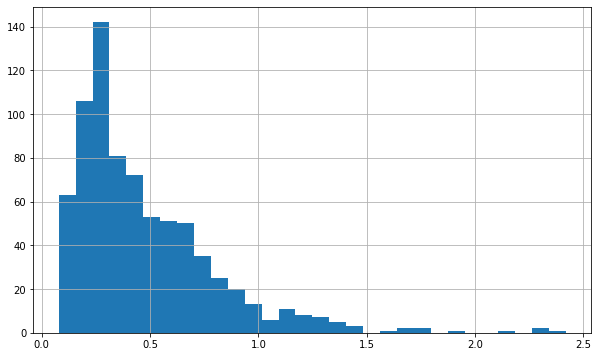

In [107]:
diabetes_droped['DiabetesPedigreeFunction'].hist(
    figsize=(10, 6), 
    bins=30,
    label='DiabetesPedigreeFunction Distribution'
    );

In [112]:
def outliers_iqr_mod(data, feature, log_scale=False):
    
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]    
    
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [109]:
outliers, cleaned = outliers_iqr_mod(diabetes_droped, 'DiabetesPedigreeFunction')
print('Количество выбросов:', outliers.shape[0])
print('Количество записей:', cleaned.shape[0])

Количество выбросов: 29
Количество записей: 732


Затем найдите число выбросов в этом же признаке в логарифмическом масштабе (при логарифмировании единицу прибавлять не нужно!). Какова разница между двумя этими числами (вычтите из первого второе)?

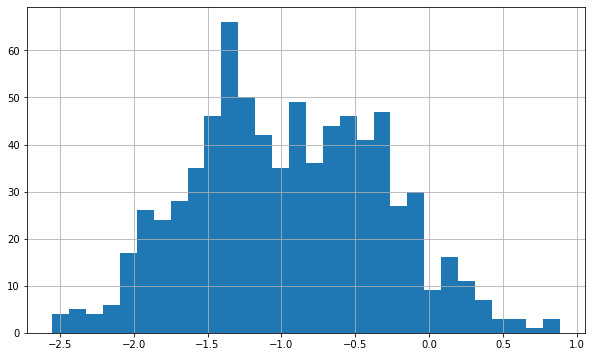

In [111]:
diabetes_droped_log = diabetes_droped
diabetes_droped_log['DiabetesPedigreeFunction'] = np.log(diabetes_droped_log['DiabetesPedigreeFunction'])


diabetes_droped_log['DiabetesPedigreeFunction'].hist(
    figsize=(10, 6), 
    bins=30,
    label='DiabetesPedigreeFunction Distribution'
    );

In [114]:
outliers, cleaned = outliers_iqr_mod(diabetes_droped, 'DiabetesPedigreeFunction', log_scale=True)
print('Количество выбросов:', outliers.shape[0])
print('Количество записей:', cleaned.shape[0])

Количество выбросов: 0
Количество записей: 761


In [115]:
outliers, cleaned = outliers_iqr_mod(diabetes_droped_log, 'DiabetesPedigreeFunction')
print('Количество выбросов:', outliers.shape[0])
print('Количество записей:', cleaned.shape[0])

Количество выбросов: 0
Количество записей: 761
